<a href="https://colab.research.google.com/github/2303a51731/AIML-2025_B11/blob/main/2303a51731_17_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of the role of specific drugs on patients using Drug Reviews (Drugs.com)

1.Identify the top 5 reasons for drug usage.
2.Identify the condition with the most usage of drugs.
3.Find the maximum and minimum count of users who found the drug review useful.
4.Name the drug most used according to drug reviews.
5.Identify the maximum count of 10-star ratings in the drug reviews.
6.Apply either a Classification Model or Clustering Model to evaluate the dataset.

In [6]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [7]:
# Step 1: Load the dataset safely
try:
    # Adjust the delimiter if needed
    df = pd.read_csv("drugsCom_train.csv", on_bad_lines='skip', low_memory=False)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path and name.")
    exit()
except Exception as e:
    print("Error loading dataset:", e)
    exit()

Dataset loaded successfully!


In [8]:
# Preview the dataset
print("\nDataset Preview:")
print(df.head())



Dataset Preview:
                                                                                                      \tdrugName\tcondition\treview\trating\tdate\tusefulCount
206461\tValsartan\tLeft Ventricular Dysfunction... I take it in combination of Bystolic 5 Mg and F...                                           2012\t27      
We have tried many different medications and so... 2010\t192                                                                                         NaN      
The positive side is that I didn&#039;t have an... 2009\t17                                                                                          NaN      
155963\tCialis\tBenign Prostatic Hyperplasia\t"... lower bowel preassure. 3rd day erections would ...                                           2015\t43      
74811\tKeppra\tEpilepsy\t""" I Ve had  nothing ... 2016\t11                                                                                          NaN      


In [10]:
# Step 1: Load the dataset safely
try:
    # Adjust the delimiter if needed
    # The original code assumed a comma as the delimiter.
    # Change the delimiter to '\t' if your file is tab-separated.
    df = pd.read_csv("drugsCom_train.csv", on_bad_lines='skip', low_memory=False, delimiter='\t')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path and name.")
    exit()
except Exception as e:
    print("Error loading dataset:", e)
    exit()

Dataset loaded successfully!


In [11]:

# Task 1: Identify the top 5 reasons for drug usage
top_reasons = df['condition'].value_counts().head(5)
print("\nTop 5 Reasons for Drug Usage:")
print(top_reasons)




Top 5 Reasons for Drug Usage:
condition
Birth Control    28788
Depression        9069
Pain              6145
Anxiety           5904
Acne              5588
Name: count, dtype: int64


In [12]:
# Task 2: Identify the condition with the most usage of drugs
most_common_condition = df['condition'].value_counts().idxmax()
print("\nCondition with the most usage of drugs:", most_common_condition)


Condition with the most usage of drugs: Birth Control


In [13]:
# Task 3: Find the max and min count of users who found the drug review useful
max_useful_count = df['usefulCount'].max()
min_useful_count = df['usefulCount'].min()
print("\nMax count of users who found a review useful:", max_useful_count)
print("Min count of users who found a review useful:", min_useful_count)



Max count of users who found a review useful: 1291
Min count of users who found a review useful: 0


In [14]:
# Task 4: Name the drug most used according to drug reviews
most_used_drug = df['drugName'].value_counts().idxmax()
print("\nMost used drug according to drug reviews:", most_used_drug)



Most used drug according to drug reviews: Levonorgestrel


In [15]:
# Task 5: Identify the max count of 10-star ratings in the drug reviews
max_10_star_count = df[df['rating'] == 10].shape[0]
print("\nMax count of 10-star ratings in the drug reviews:", max_10_star_count)


Max count of 10-star ratings in the drug reviews: 50989


In [16]:
# Task 6: Apply Classification or Clustering Model
# Encode the 'condition' column for modeling
label_encoder = LabelEncoder()
df['condition_encoded'] = label_encoder.fit_transform(df['condition'])


In [17]:
# Prepare features and target for classification
X = df[['condition_encoded', 'usefulCount']]
y = (df['rating'] >= 8).astype(int)  # Binary target: 1 for positive reviews (rating >= 8)


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Classification using Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
classification_accuracy = clf.score(X_test, y_test)
print("\nClassification Model Accuracy:", classification_accuracy)



Classification Model Accuracy: 0.6715127092374458


In [20]:
# Clustering using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
print("\nClustering Model: Assigned clusters to the dataset")


Clustering Model: Assigned clusters to the dataset


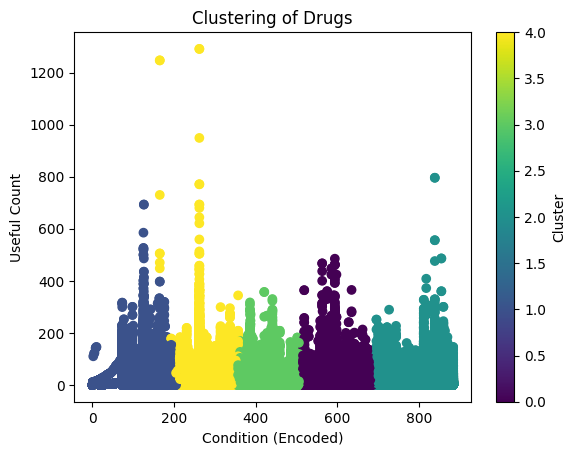

In [21]:
# Optional: Visualize the clustering result
plt.scatter(df['condition_encoded'], df['usefulCount'], c=df['cluster'], cmap='viridis')
plt.title("Clustering of Drugs")
plt.xlabel("Condition (Encoded)")
plt.ylabel("Useful Count")
plt.colorbar(label="Cluster")
plt.show()